# California Housing Price Prediction - End-to-End ML Project

**Project Type**: Supervised Learning - Regression  
**Author**: Gosaye Emshaw  
**Date**: September 2025  
**Dataset**: California Housing Dataset (Scikit-learn)  
**Objective**: Predict median house values in California districts

----

## 1. Business Problem & Objectives

### 1.1 Business Context
A company wants to invest in residential properties across California and needs a reliable way to estimate property values based on demographic and geographic data.

### 1.2 Business Objectives
- **Primary**: Build a model to predict median house values in California districts
- **Secondary**: Identify key factors that drive house prices
- **Success Metrics**: 
  - RMSE < $50,000 (business requirement)
  - R² > 0.6 (statistical requirement)
  - Model interpretability for business stakeholders

### 1.3 Technical Approach

- __Problem Type:__ Supervised Learning - Regression
- __Input:__ Census data for California districts
- __Output:__ Median house value prediction
- __Evaluation:__ Cross-validation with RMSE as primary metric

## 2. Data Acquisition & Overview

### 2.1 Import Required Packages

In [4]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# utilities
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# The ML packages will be import when necessary in a cell

print("All packages imported successfully")

All packages imported successfully


### 2.2 Load the California Housing Dataset
The dataset contains information from the 1990 California census, with one row per census block group. A block group typically has a population of 600 to 3,000 people.


In [6]:
# Import the dataset from scikit-learn datasets
from sklearn.datasets import fetch_california_housing

# Load as dataframe
housing = fetch_california_housing(as_frame=True)

# complete dataframe
df = housing.frame
# Features only
X = housing.data
# Target only
y = housing.target

print("Dataset loaded successfully")

Dataset loaded successfully


### 2.3 Dataset Description

In [8]:
# Dataset description
print("Dataset Description: \n")
print(housing.DESCR)

Dataset Description: 

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. censu

### 2.4 Initial Inspection
Before any analysis, we need to understand our data structure, quality, and basic statistics.

In [10]:
# First look of the first 10 rows
print("FIRST 10 ROWS:")
print("=" * 100)
df.head(10)

FIRST 10 ROWS:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [11]:
# Overall information of the dataset
print("DATASET INFORMATION: ")
print("=" * 50)
df.info()

DATASET INFORMATION: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [12]:
# Basic statistical summary
print("STATISTICAL SUMMARY: ")
print("=" * 125)
df.describe()

STATISTICAL SUMMARY: 


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### 2.5 Understand Distribution of Features
A quick way to see what type of data we are dealing with is plot histogram for each features to see the distribition of values

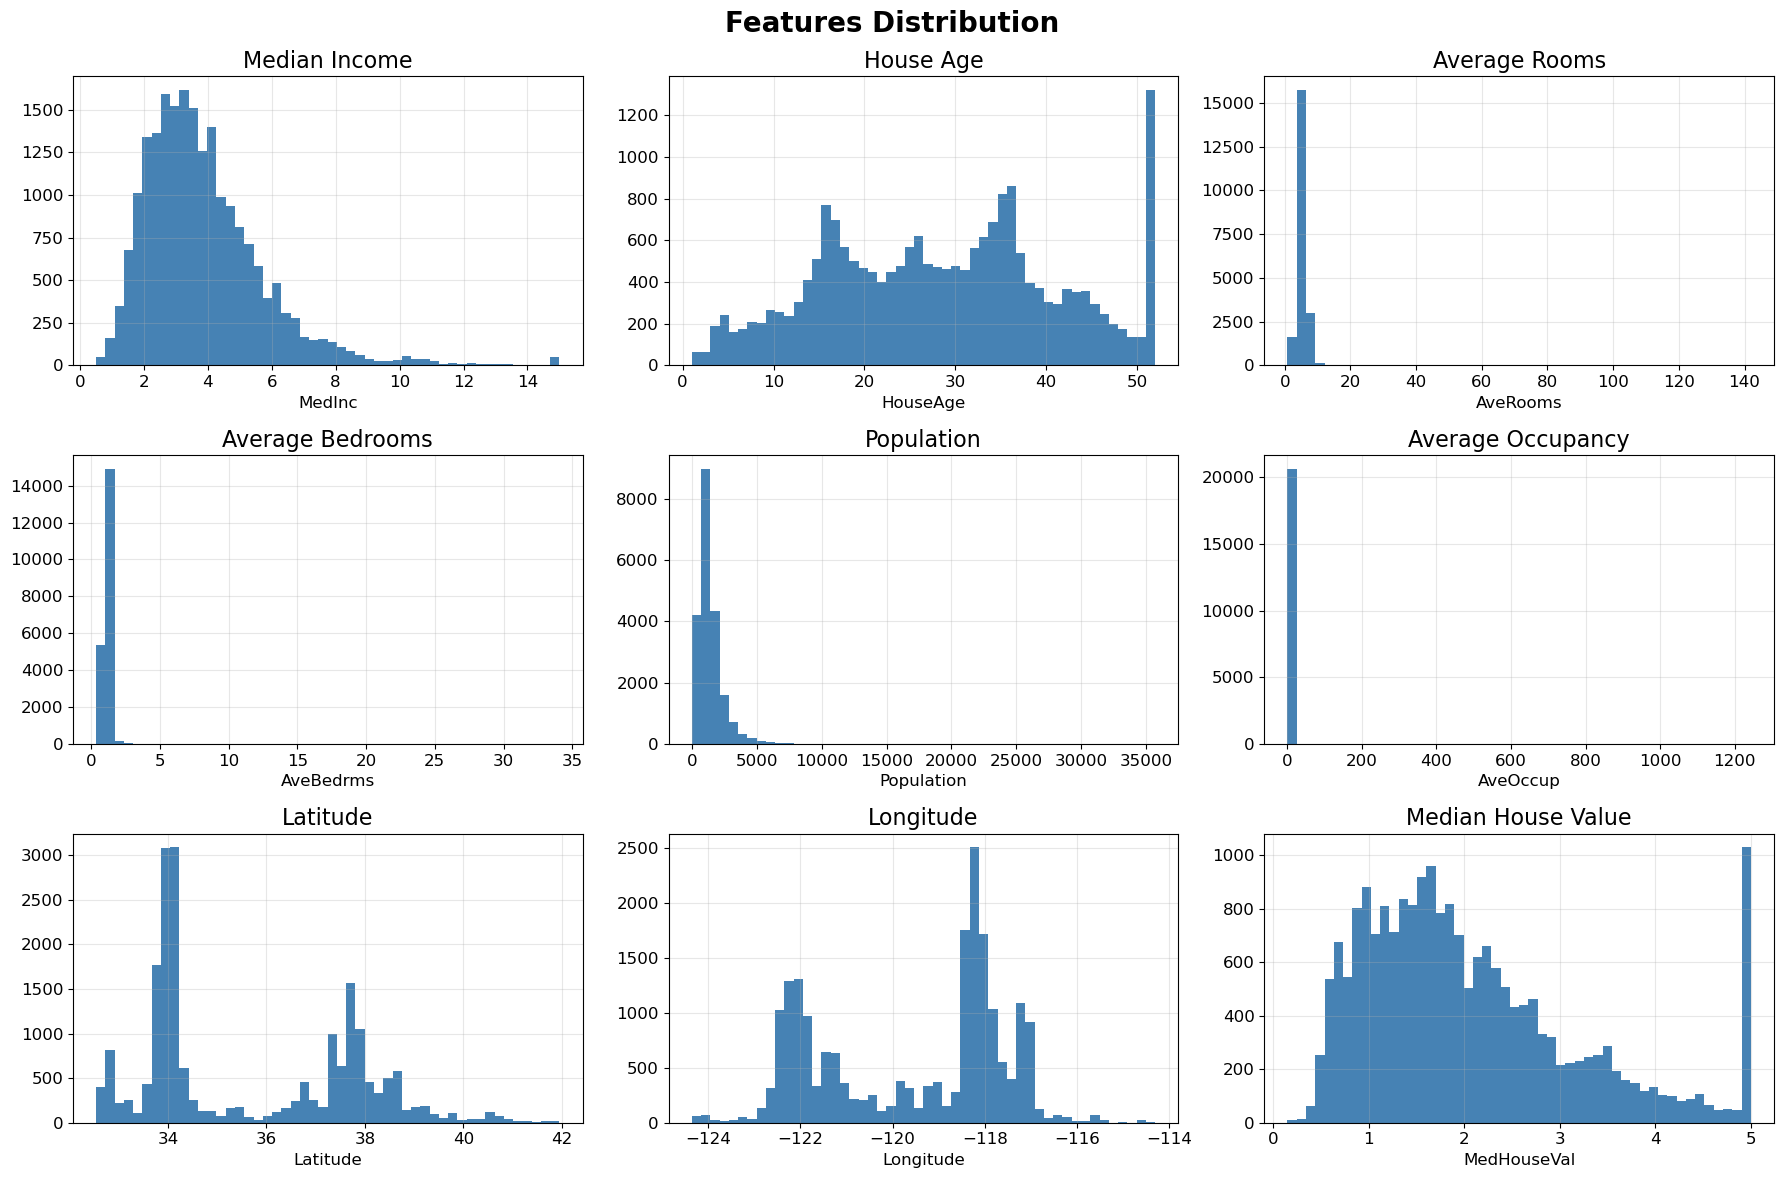

In [14]:
df_name = {
    'MedInc': 'Median Income',
    'HouseAge': 'House Age',
    'AveRooms': 'Average Rooms',
    'AveBedrms': 'Average Bedrooms',
    'Population': 'Population',
    'AveOccup': 'Average Occupancy',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude',
    'MedHouseVal': 'Median House Value'
}

fig, axes = plt.subplots(3, 3, figsize = (18, 12))
fig.suptitle("Features Distribution", fontsize = 20, fontweight = 'bold')

for i , (column, name) in enumerate(df_name.items()):
    if i >= 9:
        break

    row, col = i//3, i % 3
    ax = axes[row, col]

    ax.hist(df[column], bins = 50, color = 'steelblue')
    ax.set_title(name, fontsize = 16)
    ax.set_xlabel(column)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
# Save the figure
plt.savefig("outputs/features_histogram_plot.png", dpi = 300)
plt.show()

### 2.6 Create Test Set 

We must create our test set BEFORE any exploratory analysis to prevent data leakage and ensure unbiased evaluation. This is a fundamental ML engineering principle.

In this case 'Median Income' is an important attribute for 'Madian House Value' so we are gonna do stratified sampling with 'Median Incom'. This ensures our train/test sets have similar income distributions.

In [17]:
# Min and Max of 'MedInc'
print(f"((min, max) = {(df['MedInc'].min(), df['MedInc'].max())}")

((min, max) = (np.float64(0.4999), np.float64(15.0001))


Income Category Distribution


income_cat
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64


Percentages


income_cat
1     3.98
2    31.88
3    35.06
4    17.63
5    11.44
Name: count, dtype: float64

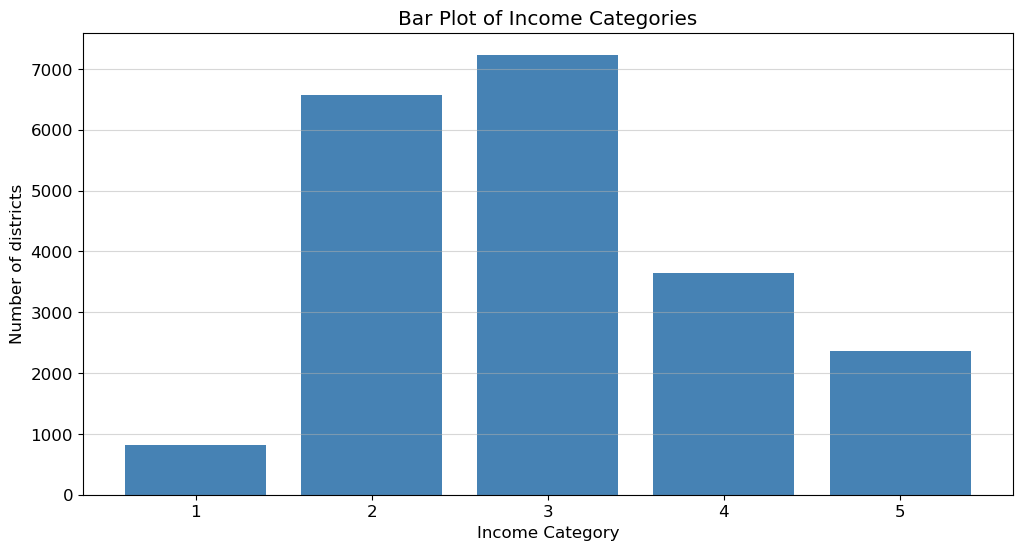

In [18]:
# Let's copy and and store the original incase ...
df_orginal = df.copy()

# Create income categories based on 'MedInc'
bins = [0, 1.5, 3, 4.5, 6, np.inf]
labels = [1, 2, 3, 4, 5]
df['income_cat'] = pd.cut(df['MedInc'], bins = bins, labels = labels)

print("Income Category Distribution")
income_cat_dist = df['income_cat'].value_counts().sort_index()
display(income_cat_dist)

print("\nPercentages")
income_cat_dist_per = (income_cat_dist/len(df) * 100).round(2)
display(income_cat_dist_per)

# Let's draw the bar plot for median income category
plt.figure(figsize = (12, 6))

plt.bar(income_cat_dist.index, income_cat_dist.values, color = 'steelblue')
plt.title("Bar Plot of Income Categories")
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.grid(True, alpha = 0.5, axis = 'y')

plt.savefig("outputs/bar_plot_of_income_categories")
plt.show()

In [19]:
# Perform stratifies train-test split
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(df, test_size = 0.2, stratify=df["income_cat"], random_state = 42)

print("Stratified split completed successfully")
print(f"Training set size : {len(strat_train_set)}")
print(f"Training set size : {len(strat_test_set)}")

Stratified split completed successfully
Training set size : 16512
Training set size : 4128


In [20]:
# Verify stratification worked correctly
print(f"\nStratification Verification:")
print("Income category proportions comparison:")
print(f"{'Category':<10} {'Overall':<10} {'Train':<10} {'Test':<10} {'Diff':<10}")
print("-" * 50)

for category in [1, 2, 3, 4, 5]:
    overall_prop = (df['income_cat'] == category).mean()
    train_prop = (strat_train_set['income_cat'] == category).mean()
    test_prop = (strat_test_set['income_cat'] == category).mean()
    diff = abs(overall_prop - test_prop)
    
    print(f"{category:<10} {overall_prop:<10.3f} {train_prop:<10.3f} {test_prop:<10.3f} {diff:<10.3f}")


Stratification Verification:
Income category proportions comparison:
Category   Overall    Train      Test       Diff      
--------------------------------------------------
1          0.040      0.040      0.040      0.000     
2          0.319      0.319      0.319      0.000     
3          0.351      0.351      0.351      0.000     
4          0.176      0.176      0.176      0.000     
5          0.114      0.114      0.114      0.000     


In [21]:
# Clean up and prepare the final train and split test
# Remove the the helper 'income_cat' column
strat_train_set = strat_train_set.drop('income_cat', axis = 'columns')
strat_test_set = strat_test_set.drop('income_cat', axis = 'columns')

# Separate features and target
X_train = strat_train_set.drop('MedHouseVal', axis = 'columns')
y_train = strat_train_set['MedHouseVal'].copy()

X_test = strat_test_set.drop('MedHouseVal', axis = 'columns') 
y_test = strat_test_set['MedHouseVal'].copy()

print("Final Datasets Prepared:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Final Datasets Prepared:
X_train shape: (16512, 8)
y_train shape: (16512,)
X_test shape: (4128, 8)
y_test shape: (4128,)


### 2.7 Data Backup and Version Control

In [23]:
# Save dataset splits for reproducibility (optional but professional)
print("Dataset Split Summary:")
print("=" * 25)
print("Dataset splits created with the following parameters:")
print(f"  - Random seed: 42")
print(f"  - Test size: 20%")
print(f"  - Stratification: Income categories (5 bins)")
print(f"  - Split method: test_train_split")
print(f"  - Date created: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")

print(f"\n Key Decisions Made:")
print(f"  - Used MedInc for stratification (strongest predictor)")
print(f"  - 5 income categories to balance granularity vs sample size")
print(f"  - 80/20 split follows industry standard")
print(f"  - Stratified split ensures representative samples")

print(f"\n  CRITICAL: Test set is now FROZEN until final evaluation")
print(f"   All EDA and model development uses ONLY the training set")

Dataset Split Summary:
Dataset splits created with the following parameters:
  - Random seed: 42
  - Test size: 20%
  - Stratification: Income categories (5 bins)
  - Split method: test_train_split
  - Date created: 2025-09-09 17:02:58

 Key Decisions Made:
  - Used MedInc for stratification (strongest predictor)
  - 5 income categories to balance granularity vs sample size
  - 80/20 split follows industry standard
  - Stratified split ensures representative samples

  CRITICAL: Test set is now FROZEN until final evaluation
   All EDA and model development uses ONLY the training set
